In [21]:
import numpy as np
import matplotlib.pyplot as plt

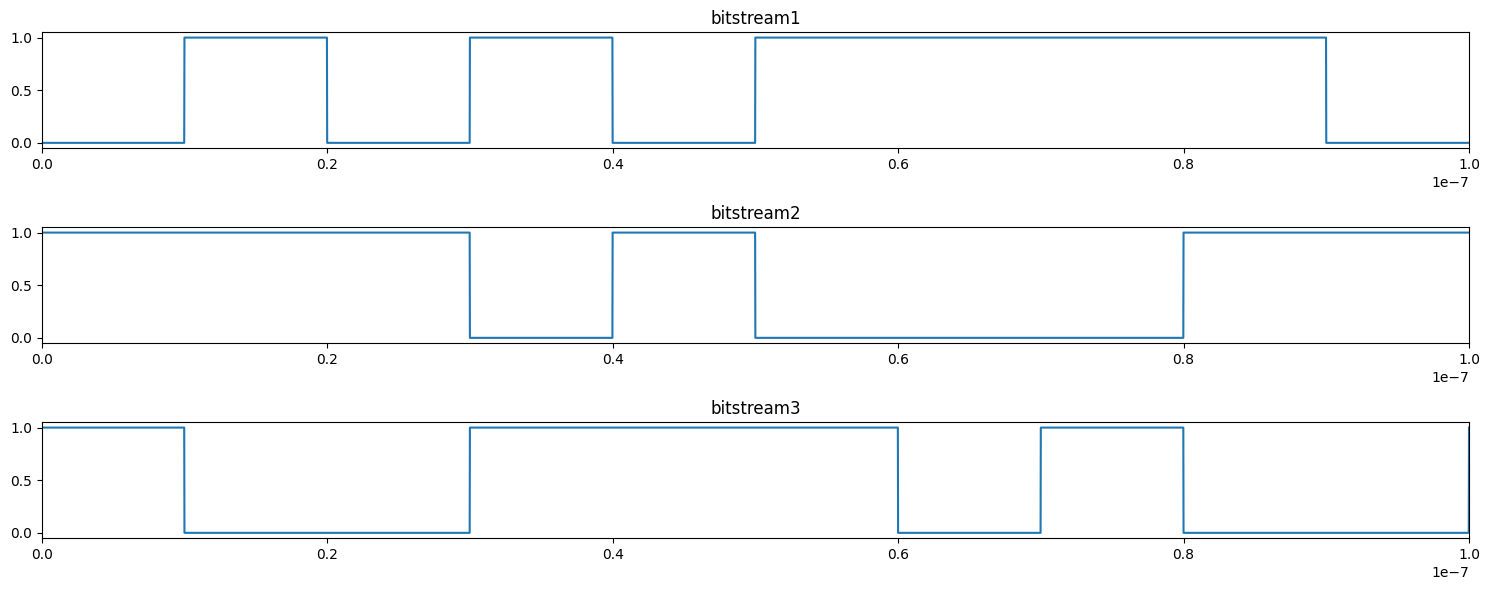

In [22]:
fs = 1 * (10 ** 8)
fc = 2 * (10 ** 9)

t = np.arange(0, 1e-6, 1/(fc * 30))

bitstream1 = np.random.randint(0, 2, 100)
bitstream2 = np.random.randint(0, 2, 100)
bitstream3 = np.random.randint(0, 2, 100)

bitstream1 = np.repeat(bitstream1, 600)
bitstream2 = np.repeat(bitstream2, 600)
bitstream3 = np.repeat(bitstream3, 600)

plt.figure(figsize=(15, 6))
plt.subplot(3, 1, 1)
plt.xlim(0, 1e-7)
plt.plot(t, bitstream1)
plt.title('bitstream1')
plt.subplot(3, 1, 2)
plt.xlim(0, 1e-7)
plt.plot(t, bitstream2)
plt.title('bitstream2')
plt.subplot(3, 1, 3)
plt.xlim(0, 1e-7)
plt.plot(t, bitstream3)
plt.title('bitstream3')
plt.tight_layout()
plt.show()



C:\Users\ic201239\AppData\Roaming\Python\Python311\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


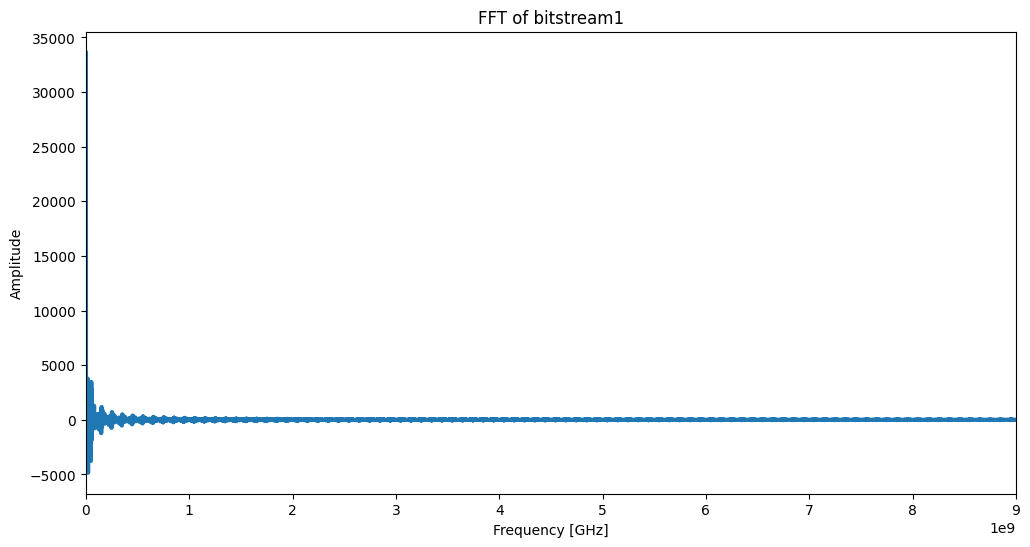

In [23]:
N = 60000

bs_fft = np.fft.rfft(bitstream1)

freq = np.fft.rfftfreq(N, 1/N) * 1e6

plt.figure(figsize=(12, 6))
plt.plot(freq, bs_fft, lw=3)
plt.xlim(0, 9e9)
plt.xlabel('Frequency [GHz]')
plt.ylabel('Amplitude')
plt.title('FFT of bitstream1')
plt.show()


In [24]:
t = np.arange(0, 1e-6, 1/(fc * 30))

modulated_wave1 = np.sin(2 * np.pi * fc * t + bitstream1 * np.pi)
modulated_wave2 = np.sin(2 * np.pi * fc * t + bitstream2 * np.pi)
modulated_wave3 = np.sin(2 * np.pi * fc * t + bitstream3 * np.pi)


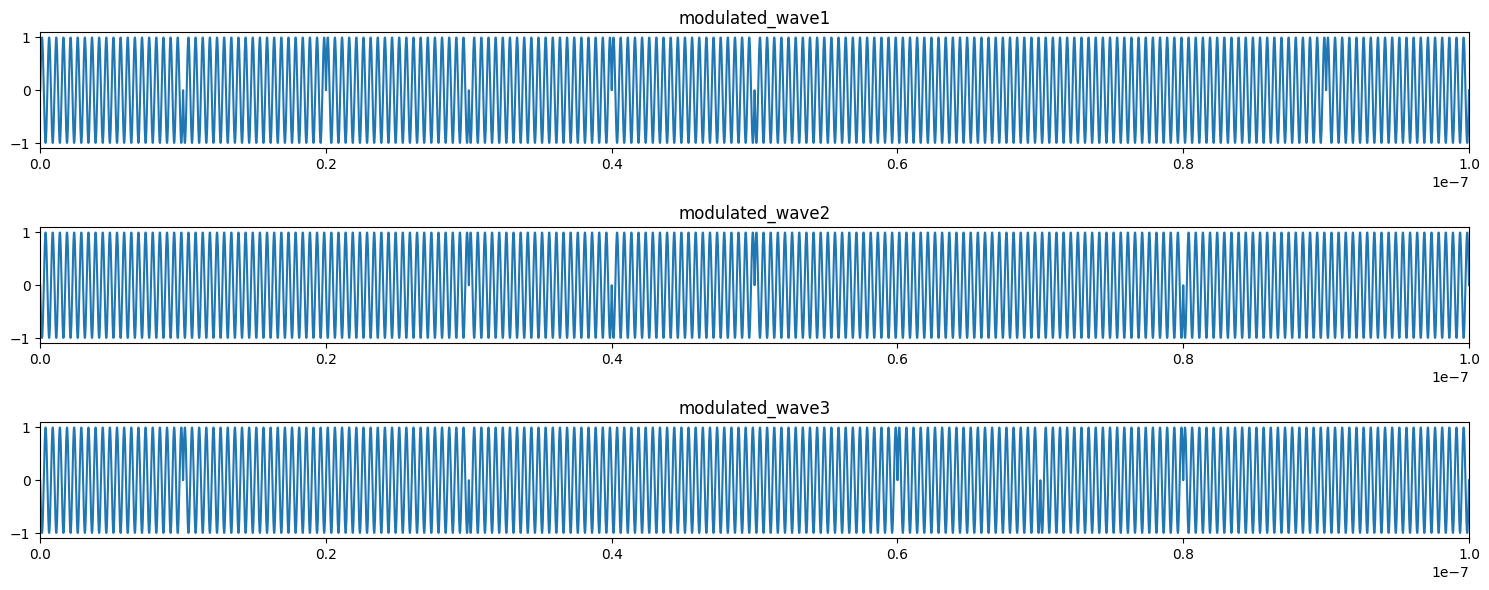

In [25]:
plt.figure(figsize=(15,6))
plt.subplot(3, 1, 1)
plt.xlim(0, 1e-7)
plt.plot(t, modulated_wave1)
plt.title('modulated_wave1')
plt.subplot(3, 1, 2)
plt.xlim(0, 1e-7)
plt.plot(t, modulated_wave2)
plt.title('modulated_wave2')
plt.subplot(3, 1, 3)
plt.xlim(0, 1e-7)
plt.plot(t, modulated_wave3)
plt.title('modulated_wave3')
plt.tight_layout()
plt.show()


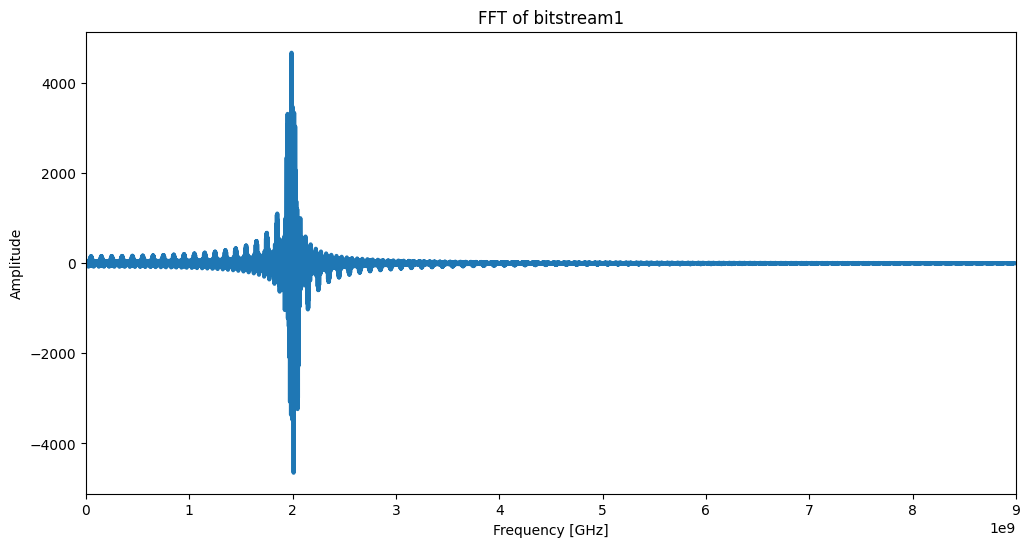

In [26]:
md_fft = np.fft.rfft(modulated_wave1)

plt.figure(figsize=(12, 6))
plt.plot(freq, md_fft, lw=3)
plt.xlim(0, 9e9)
plt.xlabel('Frequency [GHz]')
plt.ylabel('Amplitude')
plt.title('FFT of bitstream1')
plt.show()


In [27]:
PN1 = [1, 1, -1, -1]
PN2 = [1, -1, -1, 1]
PN3 = [-1, 1, -1, 1]

PN1 = np.repeat(PN1, 10)
PN2 = np.repeat(PN2, 10)
PN3 = np.repeat(PN3, 10)

PN1 = np.tile(PN1, 1500)
PN2 = np.tile(PN2, 1500)
PN3 = np.tile(PN3, 1500)


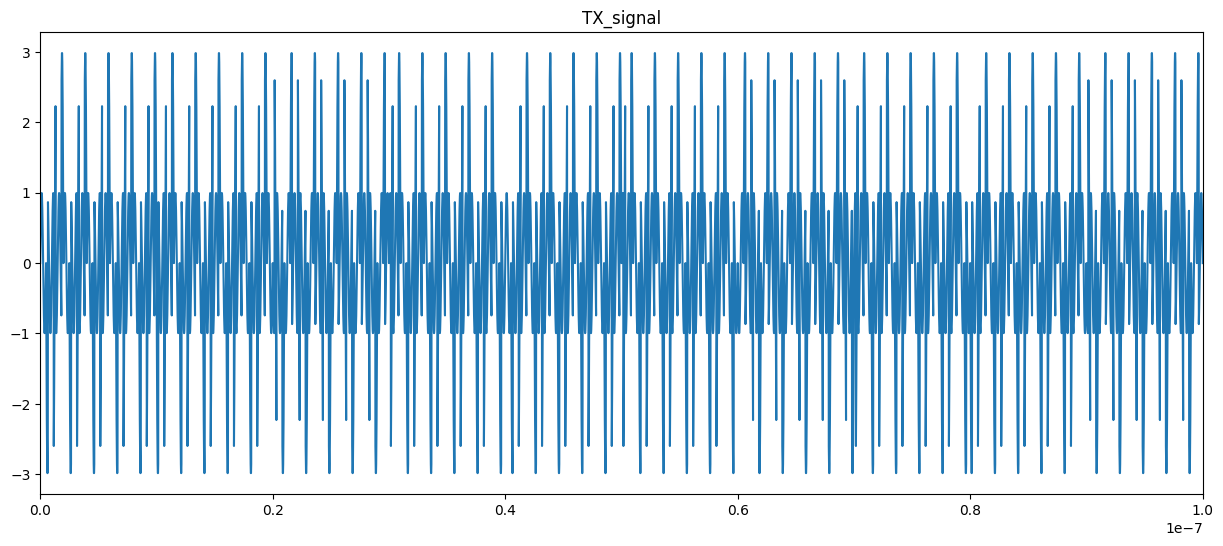

In [28]:
CDMA1 = modulated_wave1 * PN1
CDMA2 = modulated_wave2 * PN2
CDMA3 = modulated_wave3 * PN3

TX_signal = CDMA1 + CDMA2 + CDMA3

plt.figure(figsize=(15, 6))
plt.xlim(0, 1e-7)
plt.plot(t, TX_signal)
plt.title('TX_signal')
plt.show()


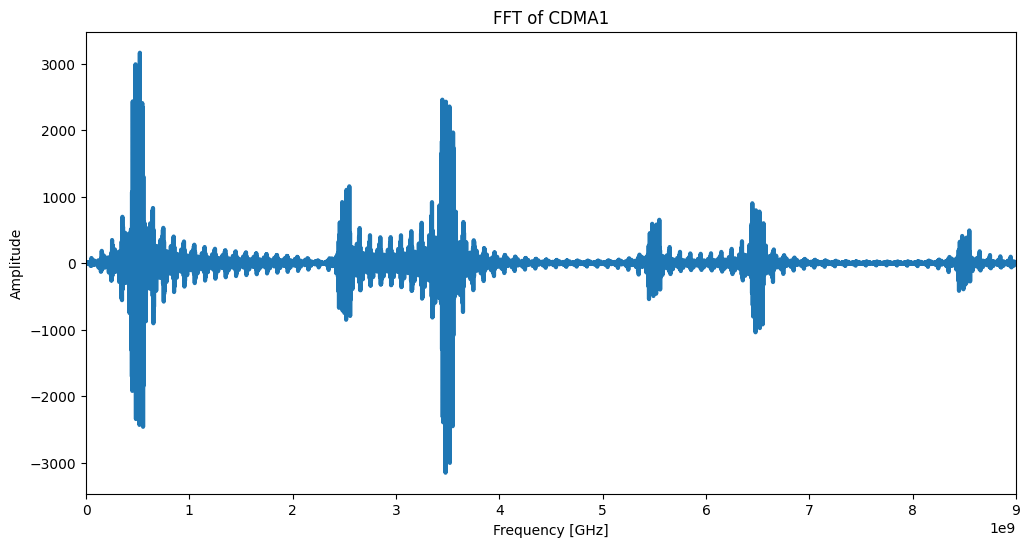

In [29]:
cdma1_fft = np.fft.rfft(CDMA1)

plt.figure(figsize=(12, 6))
plt.plot(freq, cdma1_fft, lw=3)
plt.xlim(0, 9e9)
plt.xlabel('Frequency [GHz]')
plt.ylabel('Amplitude')
plt.title('FFT of CDMA1')
plt.show()

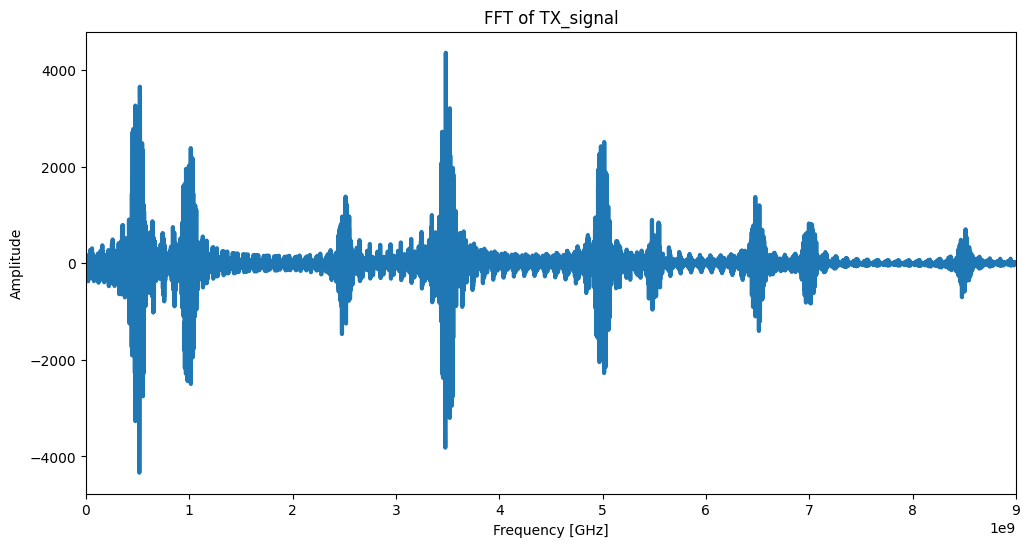

In [30]:
cdma_fft = np.fft.rfft(TX_signal)

plt.figure(figsize=(12, 6))
plt.plot(freq, cdma_fft, lw=3)
plt.xlim(0, 9e9)
plt.xlabel('Frequency [GHz]')
plt.ylabel('Amplitude')
plt.title('FFT of TX_signal')
plt.show()

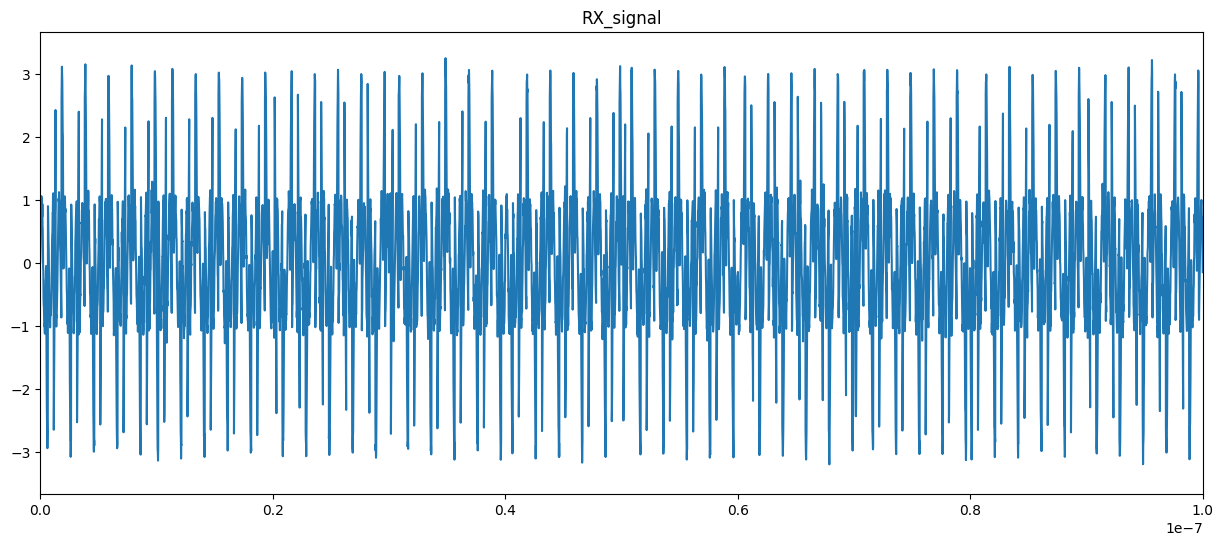

In [31]:
noise = np.random.normal(0, 0.1, len(TX_signal))

RX_signal = TX_signal + noise

plt.figure(figsize=(15, 6))

plt.xlim(0, 1e-7)
plt.plot(t, RX_signal)
plt.title('RX_signal')
plt.show()



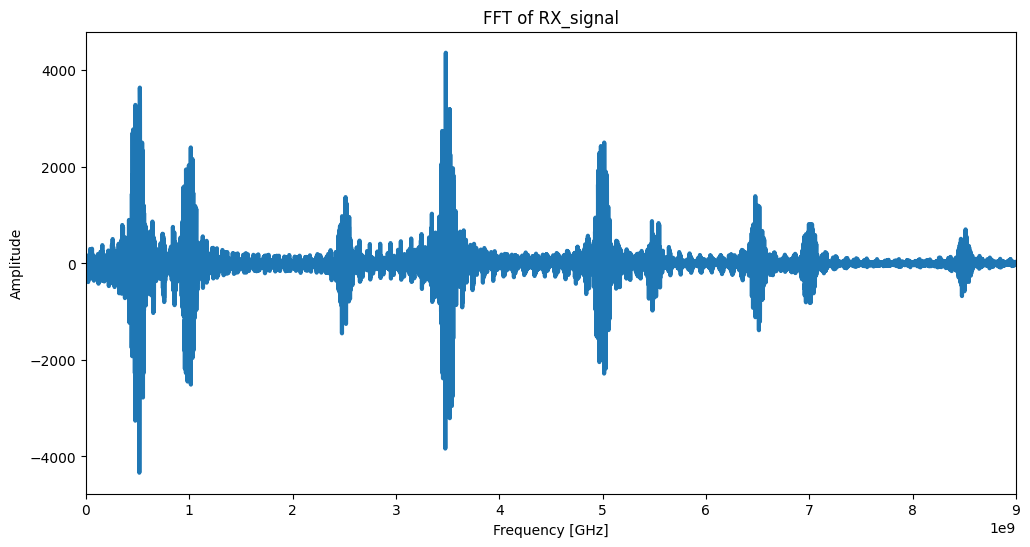

In [32]:
cdma_noise_fft = np.fft.rfft(RX_signal)

plt.figure(figsize=(12, 6))
plt.plot(freq, cdma_noise_fft, lw=3)
plt.xlim(0, 9e9)
plt.xlabel('Frequency [GHz]')
plt.ylabel('Amplitude')
plt.title('FFT of RX_signal')
plt.show()

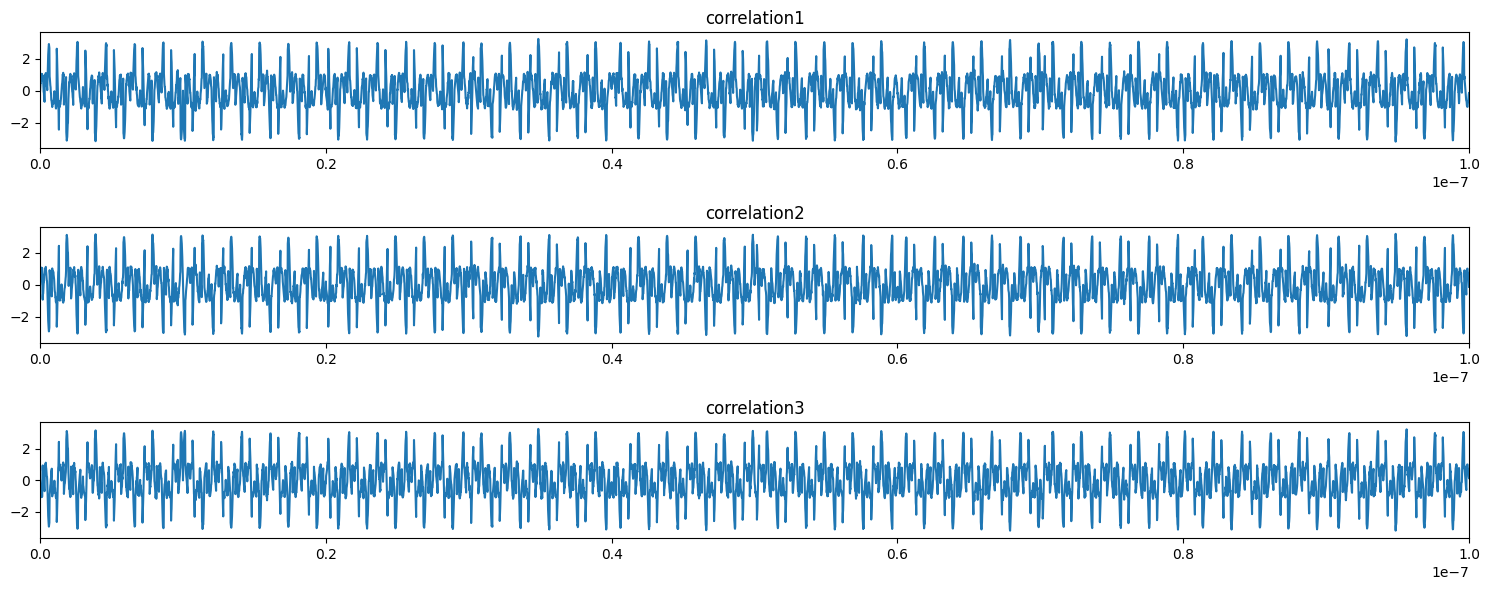

In [33]:
correlation1 = RX_signal * PN1
correlation2 = RX_signal * PN2
correlation3 = RX_signal * PN3

plt.figure(figsize=(15, 6))
plt.subplot(3, 1, 1)
plt.xlim(0, 1e-7)
plt.plot(t, correlation1)
plt.title('correlation1')
plt.subplot(3, 1, 2)
plt.xlim(0, 1e-7)
plt.plot(t, correlation2)
plt.title('correlation2')
plt.subplot(3, 1, 3)
plt.xlim(0, 1e-7)
plt.plot(t, correlation3)
plt.title('correlation3')
plt.tight_layout()
plt.show()


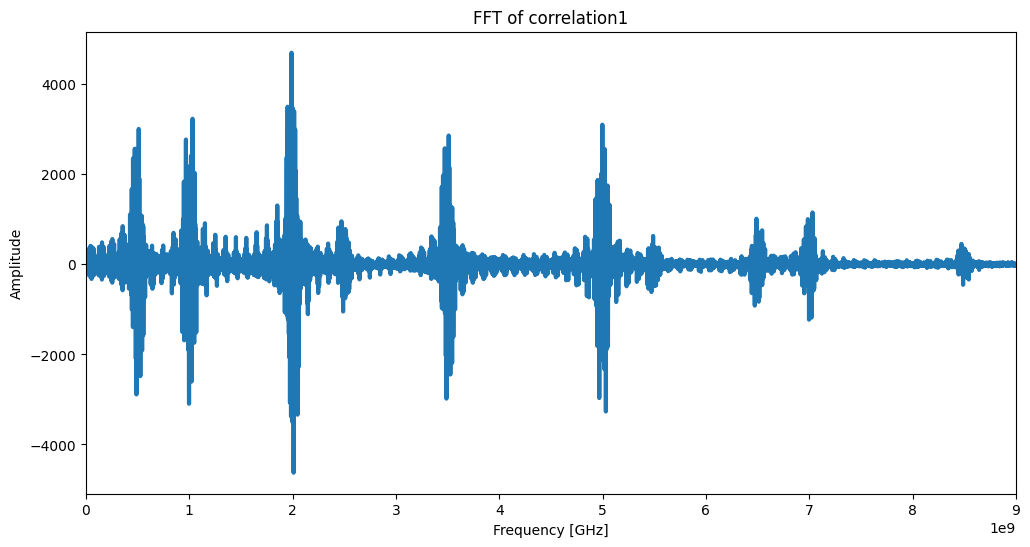

In [34]:
cr_fft = np.fft.rfft(correlation1)

plt.figure(figsize=(12, 6))
plt.plot(freq, cr_fft, lw=3)
plt.xlim(0, 9e9)
plt.xlabel('Frequency [GHz]')
plt.ylabel('Amplitude')
plt.title('FFT of correlation1')
plt.show()

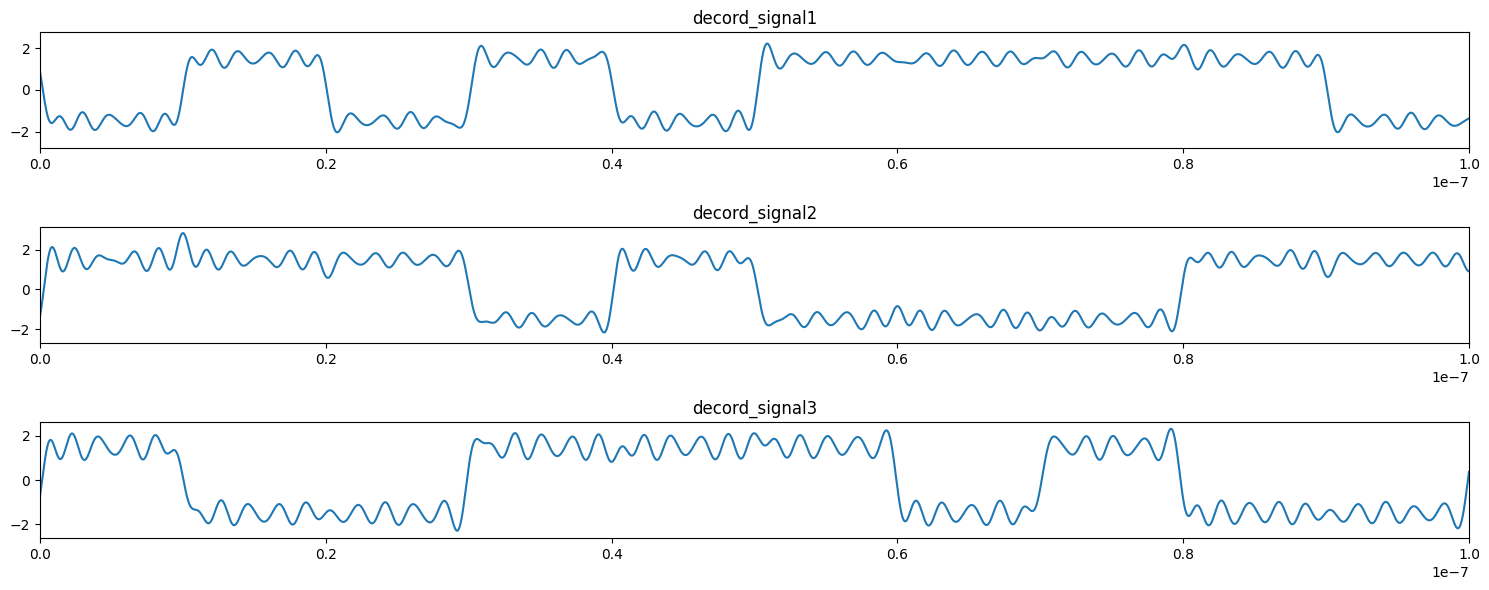

In [35]:
sync_wave = 3 * np.sin(2 * np.pi * fc * t + np.pi)

signal1_sync = correlation1 * sync_wave
signal2_sync = correlation2 * sync_wave
signal3_sync = correlation3 * sync_wave

signal1_sync_fft = np.fft.rfft(signal1_sync)
signal2_sync_fft = np.fft.rfft(signal2_sync)
signal3_sync_fft = np.fft.rfft(signal3_sync)

signal1_sync_fft[(freq > 7e8)] = 0
signal2_sync_fft[(freq > 7e8)] = 0
signal3_sync_fft[(freq > 7e8)] = 0

signal1 = np.fft.irfft(signal1_sync_fft)
signal2 = np.fft.irfft(signal2_sync_fft)
signal3 = np.fft.irfft(signal3_sync_fft)

plt.figure(figsize=(15, 6))
plt.subplot(3, 1, 1)
plt.xlim(0, 1e-7)
plt.plot(t, signal1)
plt.title('decord_signal1')
plt.subplot(3, 1, 2)
plt.xlim(0, 1e-7)
plt.plot(t, signal2)
plt.title('decord_signal2')
plt.subplot(3, 1, 3)
plt.xlim(0, 1e-7)
plt.plot(t, signal3)
plt.title('decord_signal3')
plt.tight_layout()
plt.show()


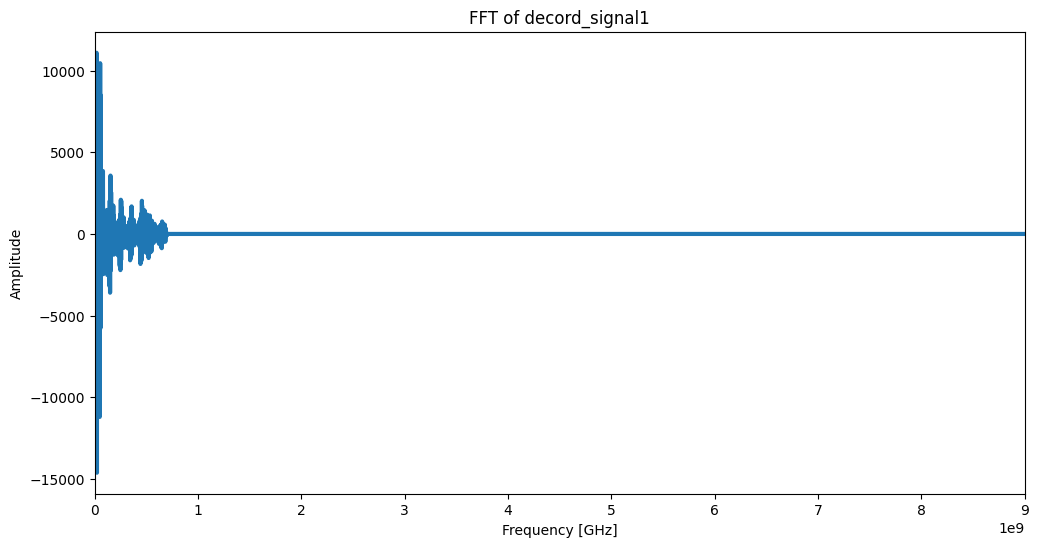

In [36]:
sig_fft = np.fft.rfft(signal1)

plt.figure(figsize=(12, 6))
plt.plot(freq, sig_fft, lw=3)
plt.xlim(0, 9e9)
plt.xlabel('Frequency [GHz]')
plt.ylabel('Amplitude')
plt.title('FFT of decord_signal1')
plt.show()

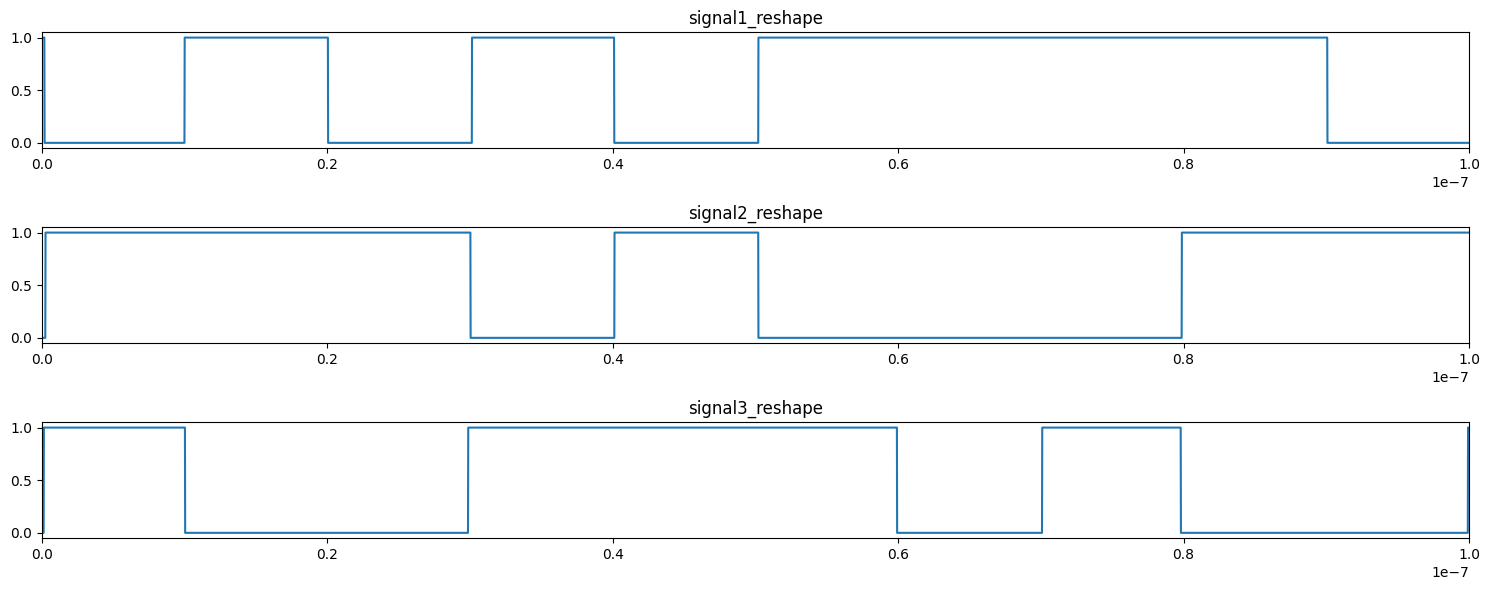

In [37]:
sig1_reshape = np.where(signal1 > 0, 1, 0)
sig2_reshape = np.where(signal2 > 0, 1, 0)
sig3_reshape = np.where(signal3 > 0, 1, 0)

plt.figure(figsize=(15, 6))
plt.subplot(3, 1, 1)
plt.xlim(0, 1e-7)
plt.plot(t, sig1_reshape)
plt.title('signal1_reshape')
plt.subplot(3, 1, 2)
plt.xlim(0, 1e-7)
plt.plot(t, sig2_reshape)
plt.title('signal2_reshape')
plt.subplot(3, 1, 3)
plt.xlim(0, 1e-7)
plt.plot(t, sig3_reshape)
plt.title('signal3_reshape')
plt.tight_layout()
plt.show()